In [1]:
import tensorflow as tf

tf.__version__

'2.0.0-rc0'

In [43]:
import pandas as pd
import warnings

In [44]:
warnings.filterwarnings('ignore')

In [3]:
from tensorflow import keras

In [4]:
mnist=keras.datasets.mnist // 28*28 images of hand written digits 0-9

In [5]:
mnist

<module 'tensorflow.python.keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\dell\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [6]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [10]:
type(x_train)

numpy.ndarray

In [11]:
type(y_train)

numpy.ndarray

In [12]:
type(x_test)

numpy.ndarray

In [13]:
type(y_test)

numpy.ndarray

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

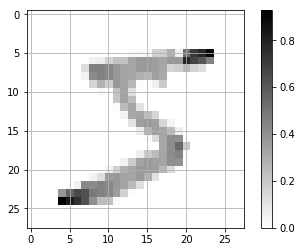

In [33]:
plt.figure()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.colorbar()
plt.grid()
plt.show()
#print(x_train[0])

In [23]:
#TO NORMALIZE THE TRAINING & TESTING DATA
x_train=keras.utils.normalize(x_train,axis=1)
x_test=keras.utils.normalize(x_test,axis=1)

In [26]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [27]:
print(x_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
x_test.shape

(10000, 28, 28)

In [32]:
y_test.shape

(10000,)

In [35]:
#Build the Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [36]:
model=Sequential()

In [37]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [38]:
#Defining the parameters for the training of the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [46]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.0869787082199473 0.9732


In [49]:
new_model=keras.models.load_model("myDigitRecognizer.model")

In [51]:
predictions=new_model.predict([x_test])

In [52]:
print(predictions)

[[1.6283356e-09 1.2559072e-08 2.4038327e-06 ... 9.9998176e-01
  8.3949825e-09 1.9322219e-07]
 [4.8074128e-07 3.2112075e-05 9.9996448e-01 ... 5.9130478e-11
  3.9770063e-09 9.2646689e-12]
 [3.8147288e-08 9.9964786e-01 1.8796371e-05 ... 1.8251814e-04
  1.2279318e-04 2.6954656e-06]
 ...
 [6.7180985e-09 3.8946705e-08 4.9117292e-09 ... 8.7509507e-06
  5.8382665e-07 1.1748254e-05]
 [7.3587653e-06 6.9861306e-07 2.3782618e-06 ... 1.2113285e-06
  3.9053027e-04 1.5363179e-08]
 [4.6408426e-05 2.4185013e-07 3.7574766e-05 ... 3.7759346e-10
  7.0763917e-07 1.9479732e-08]]


In [53]:
import numpy as np

In [65]:
print(np.argmax(predictions[0]))

7


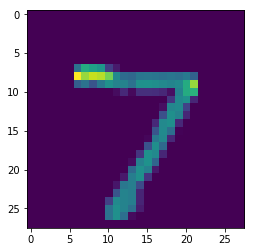

In [66]:
plt.imshow(x_test[0])
plt.show()

In [68]:
print(np.argmax(predictions[1]))

2


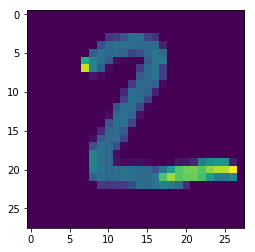

In [69]:
plt.imshow(x_test[1])
plt.show()